In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
dm = pd.read_csv('disaster_messages.csv')
dc = pd.read_csv('disaster_categories.csv')

In [8]:
genres_count = dm['genre'].value_counts()
values = genres_count.values
genres = pd.DataFrame()

In [9]:
genres['genre']=genres_count.index

In [10]:
genres['value'] = values

In [11]:
genres

,genre,value
0,news,13068
1,direct,10782
2,social,2398


In [12]:
fig = px.pie(genres, values='value', names='genre', title='Genres')
fig.show()

## Merge two table 

In [13]:
disaster = dm.merge(dc,on='id')

In [14]:
disaster

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...
...,...,...,...,...,...
26381,30261,The training demonstrated how to enhance micro...,NaN,news,related-0;request-0;offer-0;aid_related-0;medi...
26382,30262,A suitable candidate has been selected and OCH...,NaN,news,related-0;request-0;offer-0;aid_related-0;medi...
26383,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,related-1;request-0;offer-0;aid_related-0;medi...
26384,30264,"Some 2,000 women protesting against the conduc...",NaN,news,related-1;request-0;offer-0;aid_related-1;medi...


In [15]:
categories_expanded = disaster['categories'].str.split(';', expand=True)

In [16]:
category_colnames = categories_expanded.iloc[0].apply(lambda x: x.split('-')[0])
categories_split = categories_expanded.map(lambda x: x.split('-')[1]).astype(int)
categories_split.columns = category_colnames
disaster = pd.concat([disaster.drop(columns=['categories']), categories_split], axis=1)

## Hand null value and duplicate row

In [17]:
print(disaster.shape)
# Drop duplicate rows
disaster = disaster.drop_duplicates()
disaster.shape

(26386, 40)


(26216, 40)

In [18]:
df = disaster

In [19]:
df.set_index('id')

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30261,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30262,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26216 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26216 non-null  int64 
 1   message                 26216 non-null  object
 2   original                10170 non-null  object
 3   genre                   26216 non-null  object
 4   related                 26216 non-null  int32 
 5   request                 26216 non-null  int32 
 6   offer                   26216 non-null  int32 
 7   aid_related             26216 non-null  int32 
 8   medical_help            26216 non-null  int32 
 9   medical_products        26216 non-null  int32 
 10  search_and_rescue       26216 non-null  int32 
 11  security                26216 non-null  int32 
 12  military                26216 non-null  int32 
 13  child_alone             26216 non-null  int32 
 14  water                   26216 non-null  int32 
 15  food   

In [21]:
df.describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.00000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,...,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,15224.82133,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,...,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,8826.88914,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,...,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7446.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15662.50000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22924.25000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30265.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


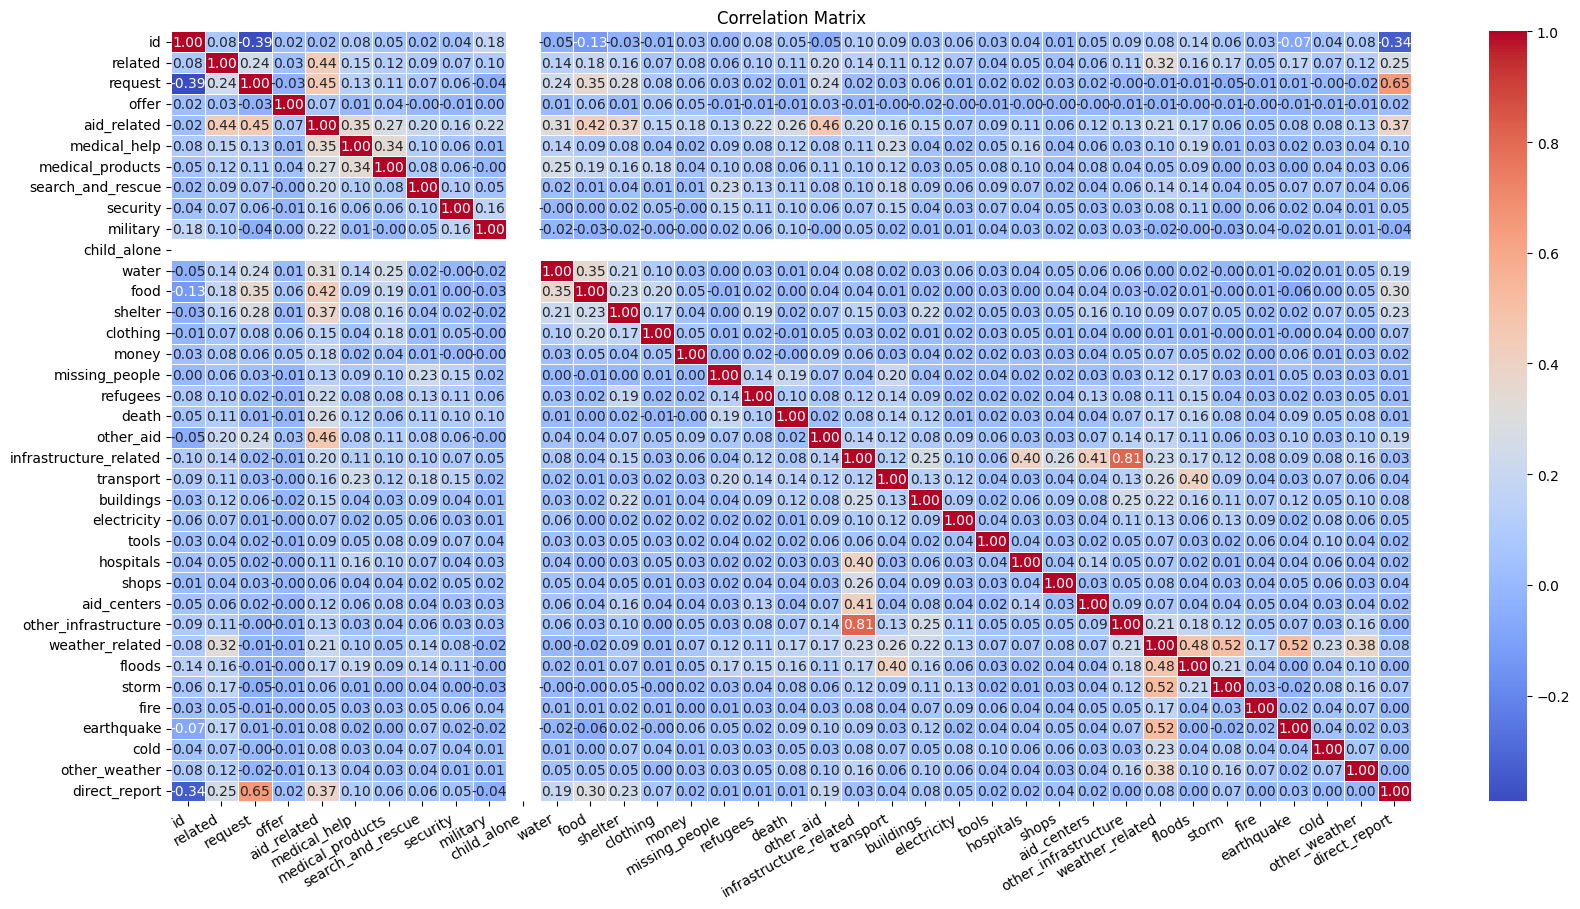

In [22]:
# Calculate the correlation matrix
# correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

In [23]:
df.columns.unique()

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [24]:
df = df.drop(columns=['child_alone'])
filtered_df = df[df['related'] <= 1]
df = filtered_df.copy()
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df = df.drop_duplicates(keep='first')

In [25]:
df.to_csv('Disaster.csv', index=False)

In [26]:
from pandas.plotting import scatter_matrix
# scatter_matrix(df1, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Convert category values to just numbers 0 or 1

In [27]:
df.describe().to_csv('lmao.csv')

In [28]:
filtered_df = df[df['related'] > 1]

In [29]:
filtered_df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


In [30]:
# Assuming you have loaded your data into a DataFrame named df

# Select only the columns you want to compare (excluding 'id', 'message', 'original', 'genre')
columns_to_compare = df.drop(columns=['id', 'message', 'original', 'genre'])
# Find rows where the content in selected columns is different from 0 and 1
different_content_rows = columns_to_compare[(columns_to_compare != 0) & (columns_to_compare != 1)].dropna()

# Print the rows with different content
print("Rows with content different from 0 and 1:")
print(different_content_rows)

Rows with content different from 0 and 1:
Empty DataFrame
Columns: [related, request, offer, aid_related, medical_help, medical_products, search_and_rescue, security, military, water, food, shelter, clothing, money, missing_people, refugees, death, other_aid, infrastructure_related, transport, buildings, electricity, tools, hospitals, shops, aid_centers, other_infrastructure, weather_related, floods, storm, fire, earthquake, cold, other_weather, direct_report]
Index: []

[0 rows x 35 columns]


In [31]:
df.columns.unique

<bound method Index.unique of Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')>

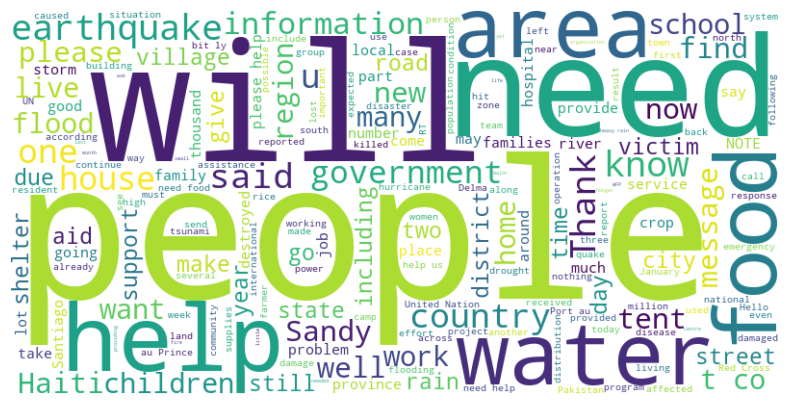

In [32]:
from wordcloud import WordCloud
# Combine all text from the column into a single string
text = ' '.join(df['message'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()